In [26]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping, Point, Polygon
import netCDF4 as nc
import xarray as xr

In [3]:
# Load the shoreline shapefile and outline Great Lakes
shoreline_path = 'C:/Users/fitzpatrick/Desktop/Data/shapefiles/glahf_gl_shoreline_wgs84.shp'
basin_path = 'C:/Users/fitzpatrick/Desktop/Data/shapefiles/glahf_lake_basin_boundaries_wgs84.shp'

# Read shapefiles
shoreline = gpd.read_file(shoreline_path)
basin = gpd.read_file(basin_path)

In [96]:
# Load CFS file
flx_file = 'C:/Users/fitzpatrick/Desktop/Data/20240716/downloaded/flxf.01.2024071500.202412.avrg.grib.nc'
flx = xr.open_dataset(flx_file)

#flx.coords['longitude'] = (flx.coords['longitude'] + 180) % 360 - 180
#flx = flx.sortby(flx.longitude)

mask = flx['LAND_surface'][0,:,:]
lhtfl = flx['LHTFL_surface'][0,:,:]
lat = flx['latitude'].values
lon = flx['longitude'].values

flx.close()

In [34]:
lat_min = np.min(lat)
lat_max = np.max(lat)
lon_min = np.min(lon)
lon_max = np.max(lon)

# Calculate grid resolution
lat_resolution = np.mean(np.diff(np.sort(lat)))  # Mean difference between sorted latitudes
lon_resolution = np.mean(np.diff(np.sort(lon)))

print(lat_min,lat_max)
print(lon_min, lon_max)
print(lat_resolution, lon_resolution)

-89.27671287819653 89.27671287819653
-179.06275195822457 179.9997493472585
0.9447271204041962 0.937500003408572


Text(0, 0.5, 'Latitude')

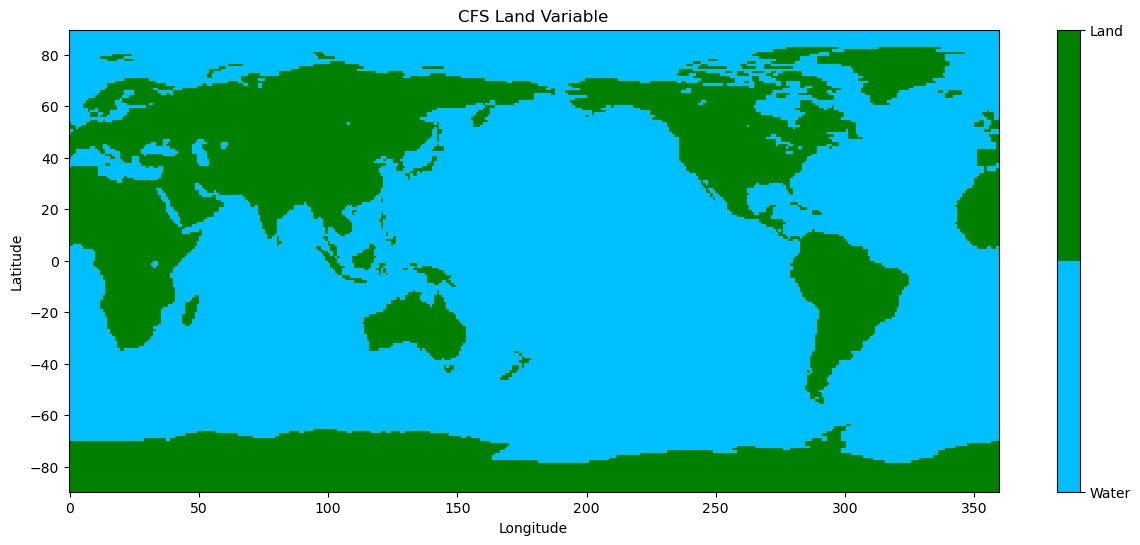

In [97]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

lat_min, lat_max = 40, 50
lon_min, lon_max = -92, -75

# Create a custom colormap
cmap = plt.cm.colors.ListedColormap(['deepskyblue', 'green'])

# Plotting the land variable
plt.figure(figsize=(15, 6))
mesh = plt.pcolormesh(lon, lat, mask, shading='auto', cmap=cmap)
# Customize the colorbar
cbar = plt.colorbar(mesh, ticks=[0, 1])
cbar.ax.set_yticklabels(['Water', 'Land'])  # Optional: Customize labels

plt.title('CFS Land Variable')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

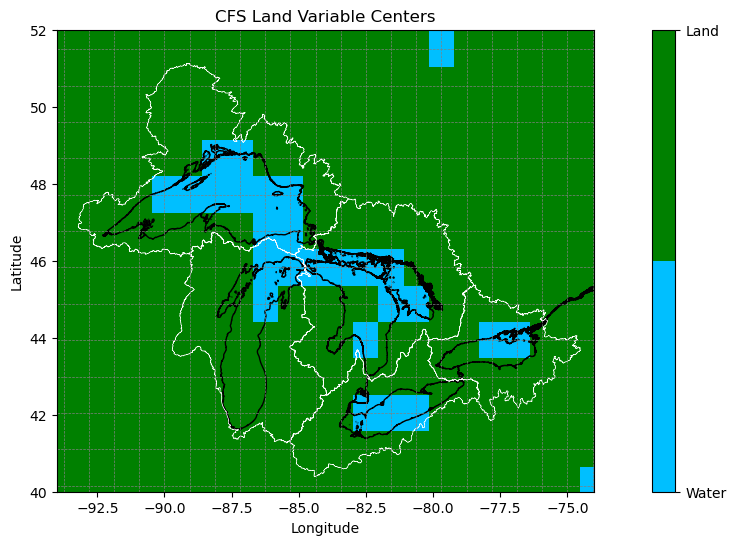

In [37]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

# Create a custom colormap
cmap = plt.cm.colors.ListedColormap(['deepskyblue', 'green'])

# Plotting the land variable
plt.figure(figsize=(15, 6))
mesh = plt.pcolormesh(lon, lat, mask, shading='auto', cmap=cmap)
shoreline.boundary.plot(ax=plt.gca(), color='black', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='white', linewidth=0.4)

# Customize the colorbar
cbar = plt.colorbar(mesh, ticks=[0, 1])
cbar.ax.set_yticklabels(['Water', 'Land'])  # Optional: Customize labels

plt.title('CFS Land Variable Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

for lat1 in lat:
    plt.axhline(y=lat1, color='gray', linewidth=0.5, linestyle='--')
for lon1 in lon:
    plt.axvline(x=lon1, color='gray', linewidth=0.5, linestyle='--')

plt.show()

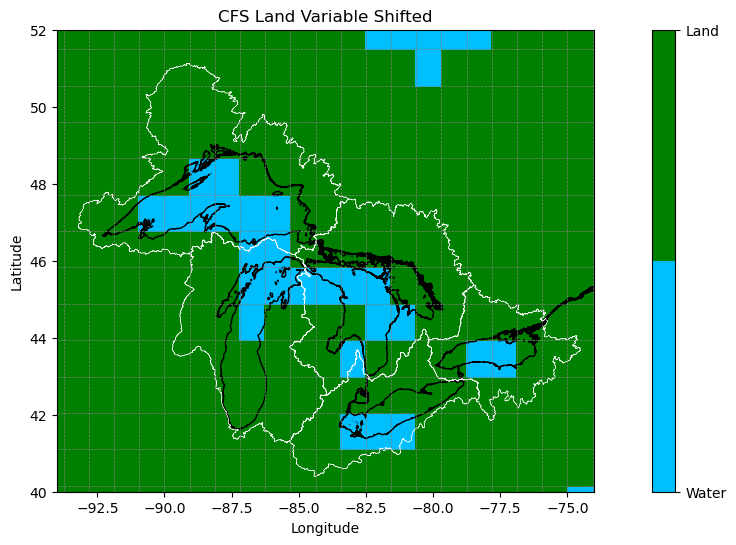

In [38]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

# Create a custom colormap
cmap = plt.cm.colors.ListedColormap(['deepskyblue', 'green'])

lon_2 = lon - 0.5
lat_2 = lat - 0.5

# Plotting the land variable
plt.figure(figsize=(15, 6))
mesh = plt.pcolormesh(lon_2, lat_2, mask, shading='auto', cmap=cmap)
shoreline.boundary.plot(ax=plt.gca(), color='black', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='white', linewidth=0.4)

# Customize the colorbar
cbar = plt.colorbar(mesh, ticks=[0, 1])
cbar.ax.set_yticklabels(['Water', 'Land'])  # Optional: Customize labels

plt.title('CFS Land Variable Shifted')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

for lat1 in lat:
    plt.axhline(y=lat1, color='gray', linewidth=0.5, linestyle='--')
for lon1 in lon:
    plt.axvline(x=lon1, color='gray', linewidth=0.5, linestyle='--')

plt.show()

C:\Users\fitzpatrick\AppData\Local\Temp\1\ipykernel_12372\1963157931.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Blues', 2)  # 2 discrete colors: water and land


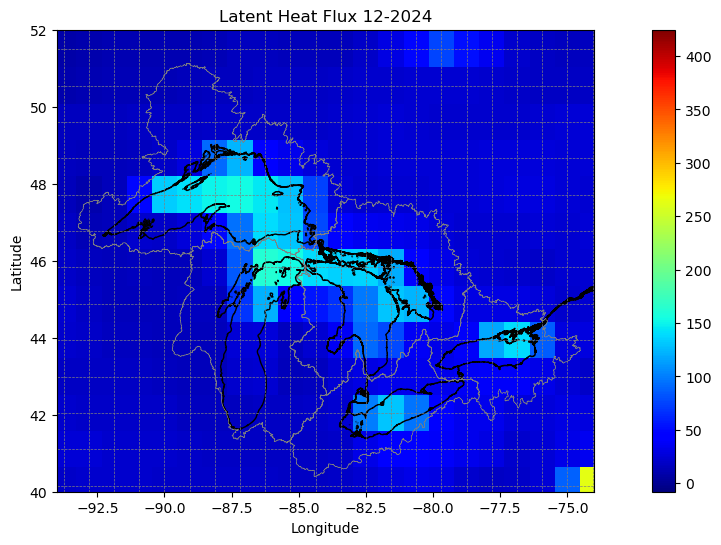

In [39]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

# Use a colormap where 0 is water and 1 is land
cmap = plt.cm.get_cmap('Blues', 2)  # 2 discrete colors: water and land
cmap.set_under('lightblue')  # Color for values below 1
cmap.set_over('green')

# Plotting the land variable
plt.figure(figsize=(15, 6))
plt.pcolormesh(lon, lat, lhtfl, shading='auto', cmap='jet')
shoreline.boundary.plot(ax=plt.gca(), color='black', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='grey', linewidth=0.4)
plt.colorbar(label='')
plt.title('Latent Heat Flux 12-2024')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
for lat1 in lat:
    plt.axhline(y=lat1, color='gray', linewidth=0.5, linestyle='--')
for lon1 in lon:
    plt.axvline(x=lon1, color='gray', linewidth=0.5, linestyle='--')

plt.show()

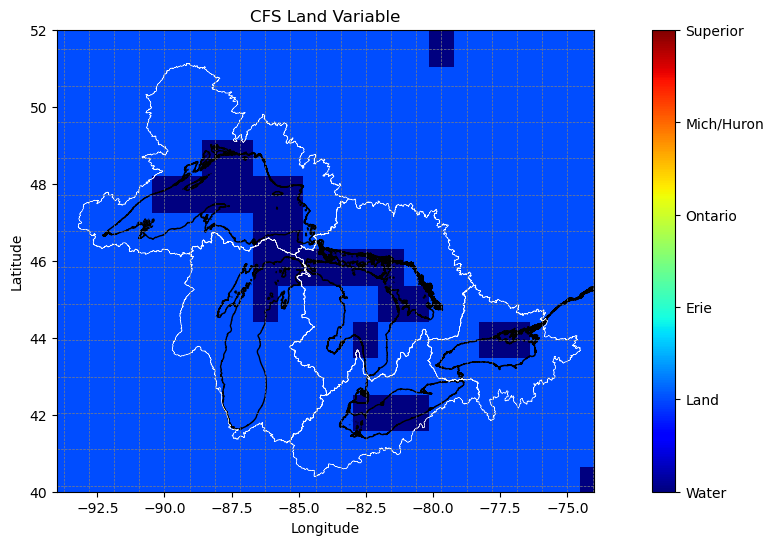

<Figure size 640x480 with 0 Axes>

In [41]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt

# Put all values back to how they are
mask_copy = mask

# Lake Erie
mask_copy[139,296] = 2
mask_copy[139,297] = 2
mask_copy[139,298] = 2

# Lake Ontario
mask_copy[141,301] = 3
mask_copy[141,302] = 3

# Lake Mich/Huron
mask_copy[141,296] = 4
mask_copy[142,297] = 4
mask_copy[142,298] = 4
mask_copy[142,292] = 4
mask_copy[143,292] = 4
mask_copy[143,293] = 4
mask_copy[143,294] = 4
mask_copy[143,295] = 4
mask_copy[143,296] = 4
mask_copy[143,297] = 4

# Lake Superior
mask_copy[144,292] = 5
mask_copy[144,293] = 5
mask_copy[145,288] = 5
mask_copy[145,289] = 5
mask_copy[145,290] = 5
mask_copy[145,291] = 5
mask_copy[145,292] = 5
mask_copy[145,293] = 5
mask_copy[146,290] = 5
mask_copy[146,291] = 5

lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

# Plotting the land variable
plt.figure(figsize=(15, 6))
mesh = plt.pcolormesh(lon, lat, mask_copy, shading='auto', cmap='jet')
shoreline.boundary.plot(ax=plt.gca(), color='black', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='white', linewidth=0.4)

# Customize the colorbar
cbar = plt.colorbar(mesh, ticks=[0, 1, 2, 3, 4, 5])
cbar.ax.set_yticklabels(['Water', 'Land', 'Erie', 'Ontario', 'Mich/Huron', 'Superior'])  # Optional: Customize labels

plt.title('CFS Land Variable')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

for lat1 in lat:
    plt.axhline(y=lat1, color='gray', linewidth=0.5, linestyle='--')
for lon1 in lon:
    plt.axvline(x=lon1, color='gray', linewidth=0.5, linestyle='--')

plt.show()

# Define a function to capture clicks
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        x_idx = int(event.xdata)
        y_idx = int(event.ydata)
        print(f'Selected grid cell: ({x_idx}, {y_idx})')
        # You can also modify the mask here if needed
        # mask[y_idx, x_idx] = new_value  # For example, marking with a specific value
        plt.scatter(x_idx, y_idx, color='red')  # Mark the selected cell

# Connect the click event
cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)
plt.show()

Latitude Resolution: 0.25 degrees
Longitude Resolution: 0.25 degrees
0.25


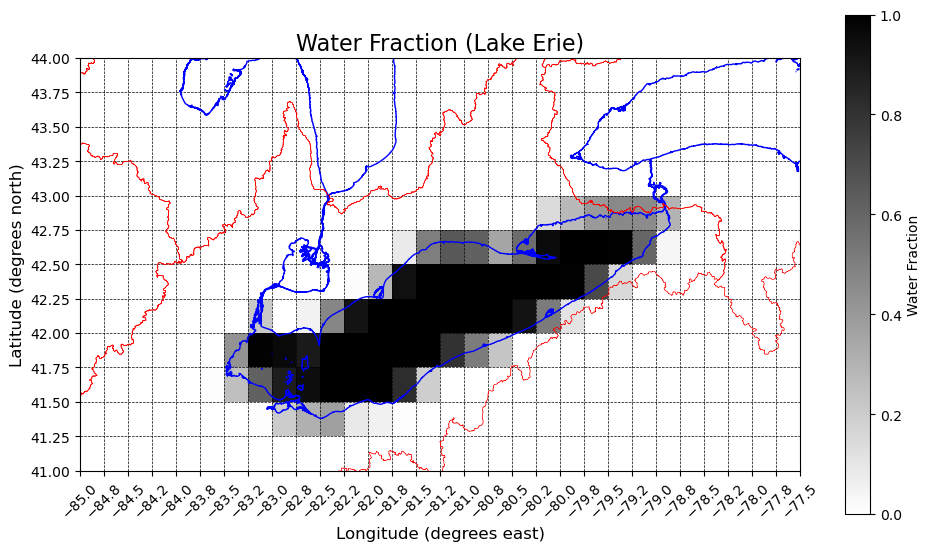

In [42]:
import xarray as xr

lat_min, lat_max = 41, 44
lon_min, lon_max = -85, -77.5

# Load the NetCDF file
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_erie_water_mask.nc'

# Open the NetCDF file using xarray
dataset = xr.open_dataset(filename)

# Extract the variables
mask = dataset['water_fraction'].values  # Extract the water_fraction data as a numpy array
lat = dataset['latitude'].values  # Extract the latitude data as a numpy array
lon = dataset['longitude'].values  # Extract the longitude data as a numpy array

# Determine the resolution
lat_resolution = np.mean(np.diff(lat))
lon_resolution = np.mean(np.diff(lon))

# Optional: print the calculated resolutions
print(f"Latitude Resolution: {lat_resolution} degrees")
print(f"Longitude Resolution: {lon_resolution} degrees")

lat_adj = lat + (0.25/2)
lon_adj = lon + (0.25/2)

print(lat[1]-lat[0])

# Plotting the water_fraction data
plt.figure(figsize=(10, 6))
# Plot the mask data with a colormap (e.g., binary or a specific colormap)
plt.pcolormesh(lon_adj, lat_adj, mask, cmap='binary', shading='auto')
plt.colorbar(label='Water Fraction')  # Color bar with label
plt.title('Water Fraction (Lake Erie)', fontsize=16)  # Title of the plot
plt.xlabel('Longitude (degrees east)', fontsize=12)  # X-axis label
plt.ylabel('Latitude (degrees north)', fontsize=12)  # Y-axis label

plt.grid(True, which='both', linestyle='--', color='k', linewidth=0.5)
# Set grid ticks based on the resolution
plt.xticks(np.arange(min(lon), max(lon)+0.25, 0.25))
plt.yticks(np.arange(min(lat), max(lat)+0.25, 0.25))

#plt.grid(True)
plt.tight_layout()  # To ensure everything fits in the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

shoreline.boundary.plot(ax=plt.gca(), color='blue', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='red', linewidth=0.4)

plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the dataset to free resources
dataset.close()

In [83]:
import xarray as xr
import numpy as np

flx_file = 'C:/Users/fitzpatrick/Desktop/Data/20240716/downloaded/flxf.01.2024071500.202412.avrg.grib.nc'
mask_file = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_erie_water_mask.nc'

# Read the mask data from the mask file
mask_ds = xr.open_dataset(mask_file)
mask = mask_ds['water_fraction']  # Assuming the mask variable is named 'mask'

# Read the reference data (grid) from the flx file
flx_ds = xr.open_dataset(flx_file)
flx_lon = flx_ds['longitude']  # Longitude values from the flx file (0 to 360)
flx_lat = flx_ds['latitude']  # Latitude values from the flx file

# Step 2: Adjust the longitude of the mask to match the reference grid (0 to 360)
# The mask longitude goes from -180 to 180, so we shift it to 0 to 360 by adding 180 to each longitude
mask_ds.coords['longitude'] = (mask_ds.coords['longitude'] + 180) % 360
mask_ds = mask_ds.sortby(mask_ds.longitude)
mask_lon = mask_ds['longitude']
mask = mask_ds['water_fraction']
print(mask.shape)
# Step 4: Interpolate the mask variable onto the new grid (flx_lat, flx_lon)
mask_interp = mask.interp(longitude=flx_lon, latitude=flx_lat, method='linear')
print(mask_interp.shape)

(280, 600)
(190, 384)


Latitude Resolution: 0.25 degrees
Longitude Resolution: 0.25 degrees
0.25


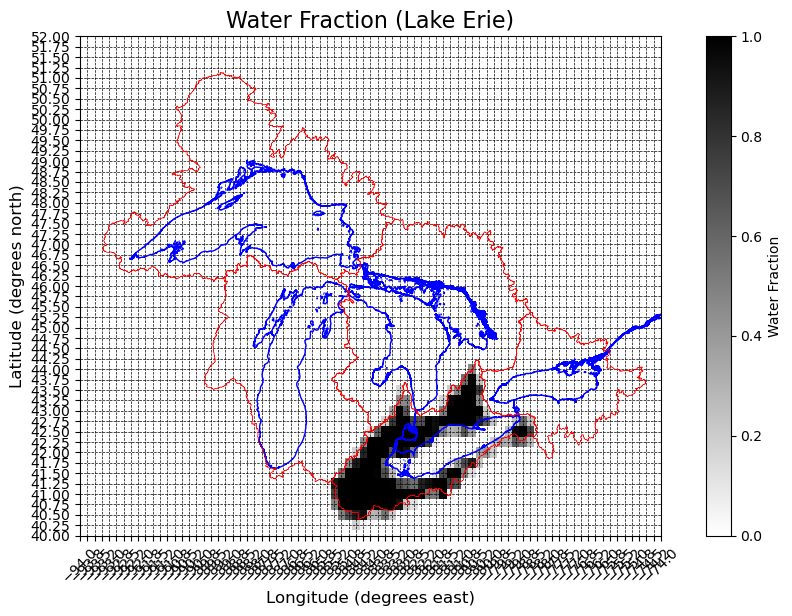

In [72]:
# Load the NetCDF file
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_erie_land_mask.nc'

# Open the NetCDF file using xarray
dataset = xr.open_dataset(filename)

# Extract the variables
mask = dataset['water_fraction'].values  # Extract the water_fraction data as a numpy array
lat = dataset['latitude'].values  # Extract the latitude data as a numpy array
lon = dataset['longitude'].values  # Extract the longitude data as a numpy array

# Determine the resolution
lat_resolution = np.mean(np.diff(lat))
lon_resolution = np.mean(np.diff(lon))

# Optional: print the calculated resolutions
print(f"Latitude Resolution: {lat_resolution} degrees")
print(f"Longitude Resolution: {lon_resolution} degrees")

lat_adj = lat #+ (0.25/2)
lon_adj = lon #+ (0.25/2)

print(lat[1]-lat[0])

# Plotting the water_fraction data
plt.figure(figsize=(10, 6))
# Plot the mask data with a colormap (e.g., binary or a specific colormap)
plt.pcolormesh(lon_adj, lat_adj, mask, cmap='binary', shading='auto')
plt.colorbar(label='Water Fraction')  # Color bar with label
plt.title('Water Fraction (Lake Erie)', fontsize=16)  # Title of the plot
plt.xlabel('Longitude (degrees east)', fontsize=12)  # X-axis label
plt.ylabel('Latitude (degrees north)', fontsize=12)  # Y-axis label

plt.grid(True, which='both', linestyle='--', color='k', linewidth=0.5)
# Set grid ticks based on the resolution
plt.xticks(np.arange(min(lon), max(lon)+0.25, 0.25))
plt.yticks(np.arange(min(lat), max(lat)+0.25, 0.25))

#plt.grid(True)
plt.tight_layout()  # To ensure everything fits in the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

shoreline.boundary.plot(ax=plt.gca(), color='blue', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='red', linewidth=0.4)

plt.xticks(rotation=45)

# Show the plot
plt.show()

# Close the dataset to free resources
dataset.close()

In [73]:
# Load the NetCDF file
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_erie_land_mask.nc'

# Open the NetCDF file using xarray
land_ds = xr.open_dataset(filename)

# The mask longitude goes from -180 to 180, so we shift it to 0 to 360 by adding 180 to each longitude
#land_ds.coords['longitude'] = (land_ds.coords['longitude'] + 180) % 360
#land_ds = land_ds.sortby(land_ds.longitude)

# Extract variables
land_lon = land_ds['longitude']
land_lat = land_ds['latitude']
land_mask_25 = land_ds['water_fraction']

# Load CFSR file for reference
filename = 'C:/Users/fitzpatrick/Desktop/Data/CFSR/flxf01.gdas.200901.nc'

# Open the NetCDF file using xarray
df = xr.open_dataset(filename)

df.coords['longitude'] = (df.coords['longitude'] + 180) % 360 - 180
df = df.sortby(df.longitude)

flx_mask_31 = df['LAND_surface'][0,:,:]  # Extract the water_fraction data as a numpy array
flx_lat_31 = df['latitude']  # Extract the latitude data as a numpy array
flx_lon_31 = df['longitude']

# Step 4: Interpolate the mask variable onto the new grid (flx_lat, flx_lon)
land_mask_31 = land_mask_25.interp(longitude=flx_lon_31, latitude=flx_lat_31, method='linear')

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:242: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:242: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\core\indexing.py:526: SerializationWarning: Unable to decode time a

In [74]:
land_mask_31.coords['longitude'] = (land_mask_31.coords['longitude'] + 180)  % 360 - 180
land_mask_31 = land_mask_31.sortby(land_mask_31.longitude)


In [75]:
print(land_mask_31.longitude[0])

<xarray.DataArray 'longitude' ()> Size: 8B
array(-179.68775065)
Coordinates:
    longitude  float64 8B -179.7


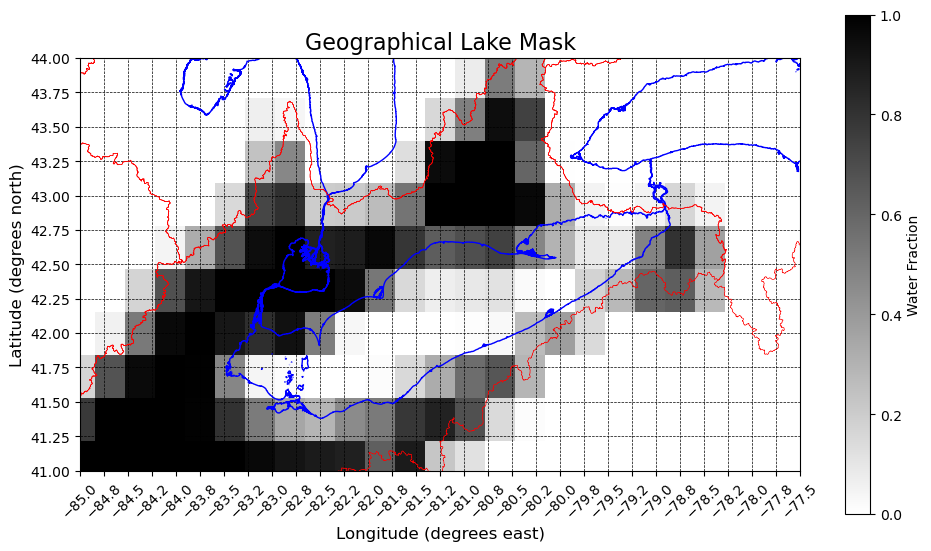

In [76]:
lat_min, lat_max = 41, 44
lon_min, lon_max = -85, -77.5

land_mask_31_nan = land_mask_31.where(land_mask_31 != 0, np.nan) 
#land_mask_31_nan_lake = land_mask_31.where(flx_mask_31 != 0, 2)
flx_mask_31_nan = flx_mask_31.where(flx_mask_31 != 1, np.nan)
#flx_mask_31_nan = flx_mask_31.where(flx_mask_31 != 0, 1)

plt.figure(figsize=(10, 6))
# Plot the mask data with a colormap (e.g., binary or a specific colormap)
plt.pcolormesh(land_mask_31.longitude, land_mask_31.latitude, land_mask_31, cmap='binary', shading='auto')
#plt.pcolormesh(flx_mask_31.longitude, flx_mask_31.latitude, flx_mask_31, cmap='grey', shading='auto')
plt.colorbar(label='Water Fraction')  # Color bar with label
plt.title('Geographical Lake Mask', fontsize=16)  # Title of the plot
plt.xlabel('Longitude (degrees east)', fontsize=12)  # X-axis label
plt.ylabel('Latitude (degrees north)', fontsize=12)  # Y-axis label

plt.grid(True, which='both', linestyle='--', color='k', linewidth=0.5)
# Set grid ticks based on the resolution
plt.xticks(np.arange(min(lon), max(lon)+0.25, 0.25))
plt.yticks(np.arange(min(lat), max(lat)+0.25, 0.25))

#plt.grid(True)
plt.tight_layout()  # To ensure everything fits in the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

shoreline.boundary.plot(ax=plt.gca(), color='blue', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='red', linewidth=0.4)

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [77]:
def interpolate_variable_to_grid(variable, df_ref):
    """
    Interpolates the specified variable to match the latitude and longitude grid of the CFSR dataset.
    
    Parameters:
    - df_ref: The xarray dataset containing the reference (CFSR) grid.
    - variable: The name of the variable to be interpolated from land_ds.
    
    Returns:
    - Interpolated variable as a new xarray DataArray.
    """

    # Extract latitude and longitude from the CFSR dataset
    lat_ref = df_ref['latitude']
    lon_ref = df_ref['longitude']

    # Slice the variable dataset to match the bounds of the CFSR dataset
    variable_cut = variable.sel(
        latitude=slice(lat_ref.min(), lat_ref.max()),  # Correct slicing for latitude
        longitude=slice(lon_ref.min(), lon_ref.max())  # Correct slicing for longitude
    )

    # Remap and interpolate the land mask data to the CFSR grid
    interpolated_variable = variable_cut.interp(
        latitude=lat_ref,  # Interpolate to the latitude of the CFSR dataset
        longitude=lon_ref,  # Interpolate to the longitude of the CFSR dataset
        method='linear'  # Use linear interpolation
    )
    
    return interpolated_variable

In [1]:
import xarray as xr

# Load the NetCDF file for the land mask
#filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_erie_basin_mask.nc'

# Open the NetCDF file using xarray
#ds = xr.open_dataset(filename)

# Extract variables
#erie_basin_25 = ds['water_fraction']

# Load the CFSR file for reference
filename = 'C:/Users/fitzpatrick/Desktop/Data/CFSR/flxf01.gdas.200901.nc'

# Open the NetCDF file using xarray
df_ref = xr.open_dataset(filename)

# Adjust longitude to be between -180 and 180 degrees
#df_ref.coords['longitude'] = (df_ref.coords['longitude'] + 180) % 360 - 180
#df_ref = df_ref.sortby(df_ref.longitude)

ref_lon = df_ref['longitude']
ref_lat = df_ref['latitude']
lake_mask_tmp = df_ref['LAND_surface'][0,:,:]

#erie_basin_31 = interpolate_variable_to_grid(erie_basin_25, df_ref)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fitzpatrick\\Desktop\\Data\\CFSR\\flxf01.gdas.200901.nc'

In [79]:
# LAND = 1 and LAKE = 0. Here all of the 1s are turned to nans and 0s are then turned to 1s.
lake_mask_tmp_1 = lake_mask_tmp.where(lake_mask_tmp != 1, np.nan)
lake_mask = lake_mask_tmp_1.where(lake_mask_tmp_1 != 0, 1)

eri_basin = erie_basin_31.where(erie_basin_31 != 0, np.nan) 

eri_lake_1 = lake_mask.where(lake_mask.latitude < 43, np.nan)
eri_lake_2 = eri_lake_1.where(lake_mask.latitude > 41, np.nan)
eri_lake_3 = eri_lake_2.where(lake_mask.longitude > -85, np.nan)
eri_lake = eri_lake_3.where(lake_mask.longitude < -78, np.nan)

eri_land = eri_basin.where(eri_lake != 1, np.nan)

In [217]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'eri_basin': eri_basin,
    'eri_lake': eri_lake,
    'eri_land': eri_land
}, coords={
    'latitude': ref_lat,
    'longitude': ref_lon
})

# Optionally, you can add additional attributes or metadata to the dataset:
new_ds.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is on the same grid as CFSR and longitudes 0 - 360.'
new_ds.attrs['created_on'] = '2024-12-20'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/lake_erie_mask.nc'
new_ds.to_netcdf(output_file)

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:644: CFWarning: this date/calendar/year zero convention is not supported by CF
  else cftime.date2num(d, units, calendar, longdouble=False)


Lake Ontario

In [84]:
# Load the NetCDF file for the geographical basin mask
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_ontario_basin_mask.nc'

# Open the NetCDF file using xarray
ds = xr.open_dataset(filename)

# Extract variables
ont_basin_25 = ds['water_fraction']

ont_basin_31 = interpolate_variable_to_grid(ont_basin_25, df_ref)

In [85]:
ont_basin = ont_basin_31.where(ont_basin_31 != 0, np.nan)

ont_lake_1 = lake_mask.where(lake_mask.latitude > 43, np.nan)
ont_lake_2 = ont_lake_1.where(lake_mask.latitude < 45, np.nan)
ont_lake_3 = ont_lake_2.where(lake_mask.longitude > -80, np.nan)
ont_lake = ont_lake_3.where(lake_mask.longitude < -75, np.nan)

ont_land = ont_basin.where(ont_lake != 1, np.nan)

In [212]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'ont_basin': ont_basin,
    'ont_lake': ont_lake,
    'ont_land': ont_land
}, coords={
    'latitude': ref_lat,
    'longitude': ref_lon
})

# Optionally, you can add additional attributes or metadata to the dataset:
new_ds.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is on the same grid as CFSR and longitudes 0 - 360.'
new_ds.attrs['created_on'] = '2024-12-20'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/lake_ontario_mask.nc'
new_ds.to_netcdf(output_file)

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:644: CFWarning: this date/calendar/year zero convention is not supported by CF
  else cftime.date2num(d, units, calendar, longdouble=False)


Lake Superior

In [86]:
# Load the NetCDF file for the geographical basin mask
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_superior_basin_mask.nc'

# Open the NetCDF file using xarray
ds = xr.open_dataset(filename)

# Extract variables
sup_basin_25 = ds['water_fraction']

sup_basin_31 = interpolate_variable_to_grid(sup_basin_25, df_ref)

In [87]:
sup_basin = sup_basin_31.where(sup_basin_31 != 0, np.nan)

sup_lake_1 = lake_mask.where(lake_mask.latitude < 49, np.nan)
sup_lake_2 = sup_lake_1.where(lake_mask.latitude > 46.25, np.nan)
sup_lake_3 = sup_lake_2.where(lake_mask.longitude > -92.5, np.nan)
sup_lake = sup_lake_3.where(lake_mask.longitude < -84, np.nan)

sup_land = sup_basin.where(sup_lake != 1, np.nan)

In [232]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'sup_basin': sup_basin,
    'sup_lake': sup_lake,
    'sup_land': sup_land
}, coords={
    'latitude': ref_lat,
    'longitude': ref_lon
})

# Optionally, you can add additional attributes or metadata to the dataset:
new_ds.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is on the same grid as CFSR and longitudes 0 - 360.'
new_ds.attrs['created_on'] = '2024-12-20'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/lake_superior_mask.nc'
new_ds.to_netcdf(output_file)

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:644: CFWarning: this date/calendar/year zero convention is not supported by CF
  else cftime.date2num(d, units, calendar, longdouble=False)


Lake Michigan

In [88]:
# Load the NetCDF file for the geographical basin mask
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_michigan_basin_mask.nc'

# Open the NetCDF file using xarray
ds = xr.open_dataset(filename)

# Extract variables
mic_basin_25 = ds['water_fraction']

mic_basin_31 = interpolate_variable_to_grid(mic_basin_25, df_ref)

In [89]:
mic_basin = mic_basin_31.where(mic_basin_31 != 0, np.nan)

mic_lake_1 = lake_mask.where(lake_mask.latitude > 41, np.nan)
mic_lake_2 = mic_lake_1.where(lake_mask.latitude < 46.25, np.nan)
mic_lake_3 = mic_lake_2.where(lake_mask.longitude > -89, np.nan)
mic_lake = mic_lake_3.where(lake_mask.longitude < -84.727, np.nan)

mic_land = mic_basin.where(mic_lake != 1, np.nan)

In [238]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'mic_basin': mic_basin,
    'mic_lake': mic_lake,
    'mic_land': mic_land
}, coords={
    'latitude': ref_lat,
    'longitude': ref_lon
})

# Optionally, you can add additional attributes or metadata to the dataset:
new_ds.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is on the same grid as CFSR and longitudes 0 - 360.'
new_ds.attrs['created_on'] = '2024-12-20'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/lake_michigan_mask.nc'
new_ds.to_netcdf(output_file)

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:644: CFWarning: this date/calendar/year zero convention is not supported by CF
  else cftime.date2num(d, units, calendar, longdouble=False)


Lake Huron

In [90]:
# Load the NetCDF file for the geographical basin mask
filename = 'C:/Users/fitzpatrick/Desktop/masks_2/lake_huron_basin_mask.nc'

# Open the NetCDF file using xarray
ds = xr.open_dataset(filename)

# Extract variables
hur_basin_25 = ds['water_fraction']

hur_basin_31 = interpolate_variable_to_grid(hur_basin_25, df_ref)

In [91]:
hur_basin = hur_basin_31.where(hur_basin_31 != 0, np.nan)

hur_lake_1 = lake_mask.where(lake_mask.latitude > 43, np.nan)
hur_lake_2 = hur_lake_1.where(lake_mask.latitude < 46.25, np.nan)
hur_lake_3 = hur_lake_2.where(lake_mask.longitude < -79.5, np.nan)
hur_lake = hur_lake_3.where(lake_mask.longitude > -84.727, np.nan)

hur_land = hur_basin.where(hur_lake != 1, np.nan)

In [247]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'hur_basin': hur_basin,
    'hur_lake': hur_lake,
    'hur_land': hur_land
}, coords={
    'latitude': ref_lat,
    'longitude': ref_lon
})

# Optionally, you can add additional attributes or metadata to the dataset:
new_ds.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is on the same grid as CFSR and longitudes 0 - 360.'
new_ds.attrs['created_on'] = '2024-12-20'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/lake_huron_mask.nc'
new_ds.to_netcdf(output_file)

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:644: CFWarning: this date/calendar/year zero convention is not supported by CF
  else cftime.date2num(d, units, calendar, longdouble=False)


In [92]:
mic_lake_tmp = mic_lake.fillna(0)
hur_lake_tmp = hur_lake.fillna(0)
mih_lake_tmp = mic_lake_tmp + hur_lake_tmp
mih_lake = mih_lake_tmp.where(mih_lake_tmp != 0, np.nan)

mic_land_tmp = mic_land.fillna(0)
hur_land_tmp = hur_land.fillna(0)
mih_land_tmp = mic_land_tmp + hur_land_tmp
mih_land = mih_land_tmp.where(mih_land_tmp != 0, np.nan)

mic_basin_tmp = mic_basin.fillna(0)
hur_basin_tmp = hur_basin.fillna(0)
mih_basin_tmp = mic_basin_tmp + hur_basin_tmp
mih_basin = mih_basin_tmp.where(mih_basin_tmp != 0, np.nan)

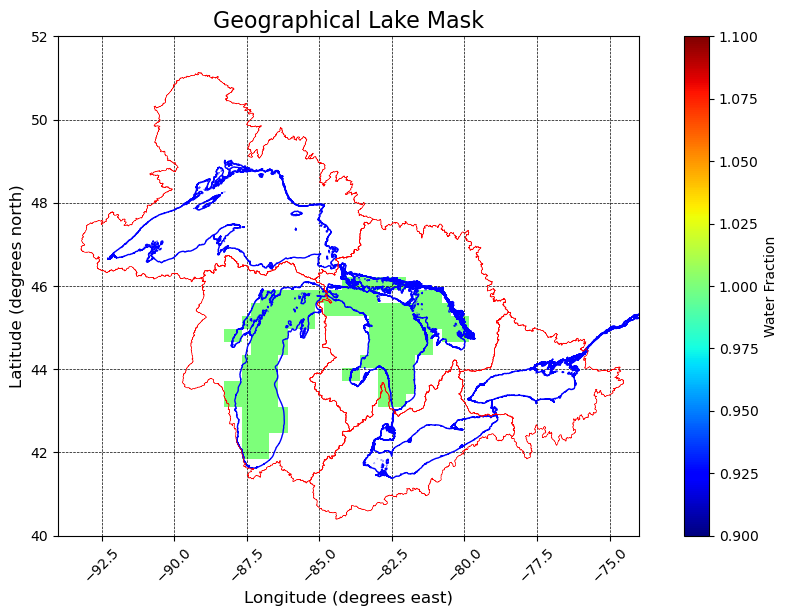

In [94]:
lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

plt.figure(figsize=(10, 6))
# Plot the mask data with a colormap (e.g., binary or a specific colormap)
plt.pcolormesh(ref_lon, ref_lat, mih_lake, cmap='jet', shading='auto')
plt.colorbar(label='Water Fraction')  # Color bar with label
plt.title('Geographical Lake Mask', fontsize=16)  # Title of the plot
plt.xlabel('Longitude (degrees east)', fontsize=12)  # X-axis label
plt.ylabel('Latitude (degrees north)', fontsize=12)  # Y-axis label

plt.grid(True, which='both', linestyle='--', color='k', linewidth=0.5)
# Set grid ticks based on the resolution
#plt.xticks(np.arange(min(lon), max(lon)+0.25, 0.25))
#plt.yticks(np.arange(min(lat), max(lat)+0.25, 0.25))

#plt.grid(True)
plt.tight_layout()  # To ensure everything fits in the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

shoreline.boundary.plot(ax=plt.gca(), color='blue', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='red', linewidth=0.4)

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [98]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'eri_basin': eri_basin,
    'eri_lake': eri_lake,
    'eri_land': eri_land,
    'ont_basin': ont_basin,
    'ont_lake': ont_lake,
    'ont_land': ont_land,
    'mih_basin': mih_basin,
    'mih_lake': mih_lake,
    'mih_land': mih_land,
    'sup_basin': sup_basin,
    'sup_lake': sup_lake,
    'sup_land': sup_land
}, coords={
    'latitude': ref_lat,
    'longitude': ref_lon
})

#lat_min, lat_max = 40, 52
#lon_min, lon_max = -94, -74

# Slice the variable dataset to match the bounds of the CFSR dataset
#new_ds_cut = new_ds.sel(
#    latitude=slice(lat_min, lat_max),  # Correct slicing for latitude
#    longitude=slice(lon_min, lon_max)  # Correct slicing for longitude
#    )

# convert back to the 0 - 360 longitude grid
#new_ds_cut.coords['longitude'] = (new_ds_cut.coords['longitude'] + 180) % 360
#new_ds_cut = new_ds_cut.sortby(new_ds_cut.longitude)

# Optionally, you can add additional attributes or metadata to the dataset:
new_ds.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is on the same grid as CFSR and longitudes 0 - 360.'
new_ds.attrs['created_on'] = '2024-12-20'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/mask_cfsr.nc'
new_ds.to_netcdf(output_file)

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:644: CFWarning: this date/calendar/year zero convention is not supported by CF
  else cftime.date2num(d, units, calendar, longdouble=False)


Create mask for CFS grid (~0.93 deg resoluation)

In [291]:
# Load the CFSR file for reference
# Load CFS file
flx_file = 'C:/Users/fitzpatrick/Desktop/Data/20240716/downloaded/flxf.01.2024071500.202412.avrg.grib.nc'
df_ref = xr.open_dataset(flx_file)

# Adjust longitude to be between -180 and 180 degrees
df_ref.coords['longitude'] = (df_ref.coords['longitude'] + 180) % 360 - 180
df_ref = df_ref.sortby(df_ref.longitude)

ref_lon = df_ref['longitude']
ref_lat = df_ref['latitude']
lake_mask_tmp = df_ref['LAND_surface'][0,:,:]

erie_basin_93 = interpolate_variable_to_grid(erie_basin_25, df_ref)
df_ref.close()

In [304]:
# LAND = 1 and LAKE = 0. Here all of the 1s are turned to nans and 0s are then turned to 1s.
lake_mask_tmp_1 = lake_mask_tmp.where(lake_mask_tmp != 1, np.nan)
lake_mask = lake_mask_tmp_1.where(lake_mask_tmp_1 != 0, 1)

eri_basin_cfs = erie_basin_93.where(erie_basin_93 != 0, np.nan) 

eri_lake_1 = lake_mask.where(lake_mask.latitude < 43, np.nan)
eri_lake_2 = eri_lake_1.where(lake_mask.latitude > 41, np.nan)
eri_lake_3 = eri_lake_2.where(lake_mask.longitude > -85, np.nan)
eri_lake_cfs = eri_lake_3.where(lake_mask.longitude < -78, np.nan)

eri_land_cfs = eri_basin_cfs.where(eri_lake_cfs != 1, np.nan)

In [316]:
ont_basin_93 = interpolate_variable_to_grid(ont_basin_25, df_ref)

ont_basin_cfs = ont_basin_93.where(ont_basin_93 != 0, np.nan)

ont_lake_1 = lake_mask.where(lake_mask.latitude > 43, np.nan)
ont_lake_2 = ont_lake_1.where(lake_mask.latitude < 45, np.nan)
ont_lake_3 = ont_lake_2.where(lake_mask.longitude > -80, np.nan)
ont_lake_cfs = ont_lake_3.where(lake_mask.longitude < -75, np.nan)

ont_land_cfs = ont_basin_cfs.where(ont_lake_cfs != 1, np.nan)

In [320]:
sup_basin_93 = interpolate_variable_to_grid(sup_basin_25, df_ref)

sup_basin_cfs = sup_basin_93.where(sup_basin_93 != 0, np.nan)

sup_lake_1 = lake_mask.where(lake_mask.latitude < 49, np.nan)
sup_lake_2 = sup_lake_1.where(lake_mask.latitude > 46.25, np.nan)
sup_lake_3 = sup_lake_2.where(lake_mask.longitude > -92.5, np.nan)
sup_lake_cfs = sup_lake_3.where(lake_mask.longitude < -84, np.nan)

sup_land_cfs = sup_basin_cfs.where(sup_lake_cfs != 1, np.nan)

In [328]:
mic_basin_93 = interpolate_variable_to_grid(mic_basin_25, df_ref)

mic_basin_cfs = mic_basin_93.where(mic_basin_93 != 0, np.nan)

mic_lake_1 = lake_mask.where(lake_mask.latitude > 41, np.nan)
mic_lake_2 = mic_lake_1.where(lake_mask.latitude < 46.25, np.nan)
mic_lake_3 = mic_lake_2.where(lake_mask.longitude > -89, np.nan)
mic_lake_cfs = mic_lake_3.where(lake_mask.longitude < -84.727, np.nan)

mic_land_cfs = mic_basin_cfs.where(mic_lake_cfs != 1, np.nan)

In [333]:
hur_basin_93 = interpolate_variable_to_grid(hur_basin_25, df_ref)

hur_basin_cfs = hur_basin_93.where(hur_basin_93 != 0, np.nan)

hur_lake_1 = lake_mask.where(lake_mask.latitude > 43, np.nan)
hur_lake_2 = hur_lake_1.where(lake_mask.latitude < 46.25, np.nan)
hur_lake_3 = hur_lake_2.where(lake_mask.longitude < -79.5, np.nan)
hur_lake_cfs = hur_lake_3.where(lake_mask.longitude > -84.727, np.nan)

hur_land_cfs = hur_basin_cfs.where(hur_lake_cfs != 1, np.nan)

In [341]:
mic_lake_tmp = mic_lake_cfs.fillna(0)
hur_lake_tmp = hur_lake_cfs.fillna(0)
mih_lake_tmp = mic_lake_tmp + hur_lake_tmp
mih_lake_cfs = mih_lake_tmp.where(mih_lake_tmp != 0, np.nan)

mic_land_tmp = mic_land_cfs.fillna(0)
hur_land_tmp = hur_land_cfs.fillna(0)
mih_land_tmp = mic_land_tmp + hur_land_tmp
mih_land_cfs = mih_land_tmp.where(mih_land_tmp != 0, np.nan)

mic_basin_tmp = mic_basin_cfs.fillna(0)
hur_basin_tmp = hur_basin_cfs.fillna(0)
mih_basin_tmp = mic_basin_tmp + hur_basin_tmp
mih_basin_cfs = mih_basin_tmp.where(mih_basin_tmp != 0, np.nan)

mih_land_cfs = mih_basin_cfs.where(mih_lake_cfs != 1, np.nan)

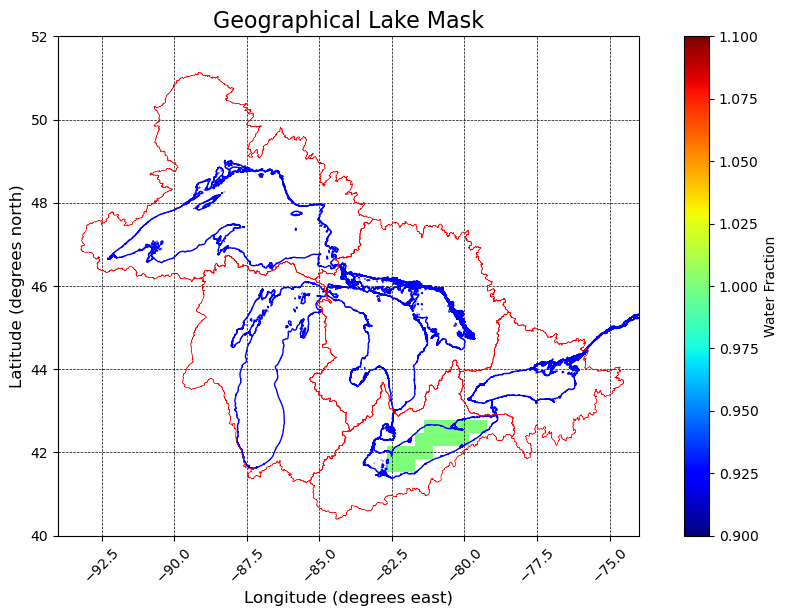

In [99]:
lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

plt.figure(figsize=(10, 6))
# Plot the mask data with a colormap (e.g., binary or a specific colormap)
plt.pcolormesh(ref_lon, ref_lat, eri_lake, cmap='jet', shading='auto')
plt.colorbar(label='Water Fraction')  # Color bar with label
plt.title('Geographical Lake Mask', fontsize=16)  # Title of the plot
plt.xlabel('Longitude (degrees east)', fontsize=12)  # X-axis label
plt.ylabel('Latitude (degrees north)', fontsize=12)  # Y-axis label

plt.grid(True, which='both', linestyle='--', color='k', linewidth=0.5)

#plt.grid(True)
plt.tight_layout()  # To ensure everything fits in the figure
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)

shoreline.boundary.plot(ax=plt.gca(), color='blue', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='red', linewidth=0.4)

plt.xticks(rotation=45)

# Show the plot
plt.show()

In [1]:
# Create a new xarray Dataset to hold all variables
new_ds = xr.Dataset({
    'eri_basin': eri_basin_cfs,
    'eri_lake': eri_lake_cfs,
    'eri_land': eri_land_cfs,
    'ont_basin': ont_basin_cfs,
    'ont_lake': ont_lake_cfs,
    'ont_land': ont_land_cfs,
    'mih_basin': mih_basin_cfs,
    'mih_lake': mih_lake_cfs,
    'mih_land': mih_land_cfs,
    'sup_basin': sup_basin_cfs,
    'sup_lake': sup_lake_cfs,
    'sup_land': sup_land_cfs
}, coords={
    'latitude': ref_lat,
    'longitude': ref_lon
})

lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

# Slice the variable dataset to match the bounds of the CFSR dataset
new_ds_cut = new_ds.sel(
    latitude=slice(lat_min, lat_max),  # Correct slicing for latitude
    longitude=slice(lon_min, lon_max)  # Correct slicing for longitude
    )

# convert back to the 0 - 360 longitude grid
new_ds_cut.coords['longitude'] = (new_ds_cut.coords['longitude'] + 180) % 360
new_ds_cut = new_ds_cut.sortby(new_ds.longitude)

# Optionally, you can add additional attributes or metadata to the dataset:
new_ds_cut.attrs['description'] = 'This dataset was created using geographical masks for each of the Great Lakes basins and the land/lake mask taken from CFSR. It is on the same grid as CFSR and longitudes 0 - 360.'
new_ds_cut.attrs['created_on'] = '2024-12-20'

# Save the new dataset to a NetCDF file
output_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/mask_cfs.nc'
new_ds_cut.to_netcdf(output_file)

NameError: name 'xr' is not defined

c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:242: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.num2date(num_dates, units, calendar, only_use_cftime_datetimes=True)
c:\Users\fitzpatrick\AppData\Local\miniconda3\envs\myenv\Lib\site-packages\xarray\coding\times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


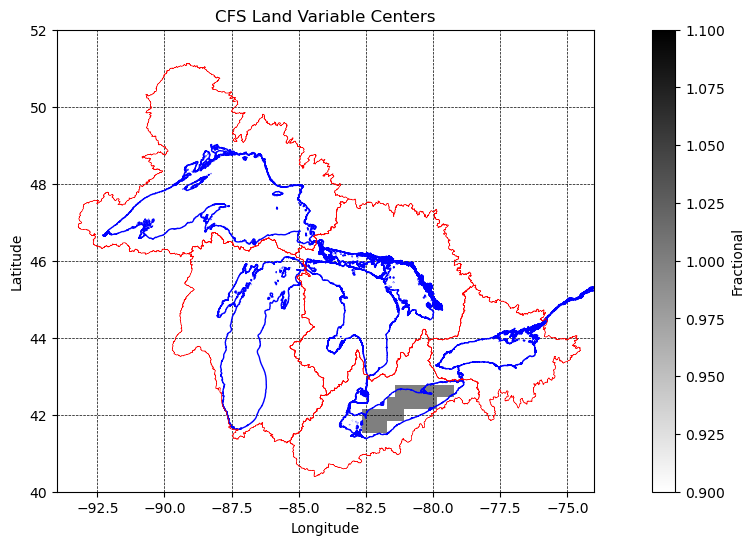

In [102]:
mask_file = 'C:/Users/fitzpatrick/Desktop/Data/created_masks/mask_cfsr_converted.nc'
mask = xr.open_dataset(mask_file)

# Adjust longitude to be between -180 and 180 degrees
mask.coords['longitude'] = (mask.coords['longitude'] + 180) % 360 - 180
mask = mask.sortby(mask.longitude)

eri_basin = mask['eri_basin'].values
lat = mask['latitude'].values
lon = mask['longitude'].values

lat_min, lat_max = 40, 52
lon_min, lon_max = -94, -74

# Plotting the land variable
plt.figure(figsize=(15, 6))

mesh = plt.pcolormesh(lon, lat, eri_lake, shading='auto', cmap='binary')
plt.colorbar(label='Fractional')

shoreline.boundary.plot(ax=plt.gca(), color='blue', linewidth=1)
basin.boundary.plot(ax=plt.gca(), color='red', linewidth=0.4)

plt.title('CFS Land Variable Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_min, lon_max)
plt.ylim(lat_min, lat_max)
plt.grid(True, which='both', linestyle='--', color='k', linewidth=0.5)

plt.show()